In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df_sales = pd.read_csv(r"C:\Users\yangw\iCloudDrive\Desktop\INFO558 Application of deep neutral network\beach_demand_forecast\sales_train.csv") #windows
df_items = pd.read_csv(r"C:\Users\yangw\iCloudDrive\Desktop\INFO558 Application of deep neutral network\beach_demand_forecast\items.csv") #windows
df_restaurant = pd.read_csv(r"C:\Users\yangw\iCloudDrive\Desktop\INFO558 Application of deep neutral network\beach_demand_forecast\resturants.csv") #windows
df_person = pd.read_excel(r"C:\Users\yangw\iCloudDrive\Desktop\INFO558 Application of deep neutral network\beach_demand_forecast\IMGpersonF(1).xlsx")  #windows

#df_sales=pd.read_csv("/Users/yangweichao/Desktop/INFO558 Application of deep neutral network/beach_demand_forecast/sales_train.csv") #mac
#df_items=pd.read_csv("/Users/yangweichao/Desktop/INFO558 Application of deep neutral network/beach_demand_forecast/items.csv") #mac
#df_restaurant=pd.read_csv("/Users/yangweichao/Desktop/INFO558 Application of deep neutral network/beach_demand_forecast/resturants.csv") #mac
#df_person=pd.read_excel("/Users/yangweichao/Desktop/INFO558 Application of deep neutral network/beach_demand_forecast/IMGpersonF(1).xlsx") #mac

df_sales.date = pd.to_datetime(df_sales.date, errors='coerce')
df_sales['weekday'] = df_sales.date.dt.day_name()
start_date = df_sales.date.min()
df_sales['week'] = (((df_sales.date - start_date).dt.days)/7).astype(int) 

In [3]:
df_person.sort_values(by=['date'], inplace=True)
df_person

,Unnamed: 0,person,image,date
17,17,19,1.jpg,1900-01-01
16,16,17,2019_01_01.jpg,2019-01-01
18,18,16,2019_01_02.jpg,2019-01-02
79,79,18,2019_01_03.jpg,2019-01-03
27,27,16,2019_01_04.jpg,2019-01-04
...,...,...,...,...
1047,1047,11,2021_12_27.jpg,2021-12-27
1095,1095,12,2021_12_28.jpg,2021-12-28
1094,1094,14,2021_12_29.jpg,2021-12-29
1091,1091,16,2021_12_30.jpg,2021-12-30


In [4]:
df_sales

,date,item_id,price,item_count,weekday,week
0,2019-01-01,3,29.22,2,Tuesday,0
1,2019-01-01,4,26.42,22,Tuesday,0
2,2019-01-01,12,4.87,7,Tuesday,0
3,2019-01-01,13,4.18,12,Tuesday,0
4,2019-01-01,16,3.21,136,Tuesday,0
...,...,...,...,...,...,...
100395,2021-09-30,96,21.93,0,Thursday,143
100396,2021-09-30,97,28.65,0,Thursday,143
100397,2021-09-30,98,5.00,0,Thursday,143
100398,2021-09-30,99,5.32,0,Thursday,143


In [5]:
df_items

,id,store_id,name,kcal,cost
0,1,4,Chocolate Cake,554,6.71
1,2,4,Breaded Fish with Vegetables Meal,772,15.09
2,3,1,Sweet Fruity Cake,931,29.22
3,4,1,Amazing Steak Dinner with Rolls,763,26.42
4,5,5,Milk Cake,583,6.07
...,...,...,...,...,...
95,96,5,Blue Ribbon Fish with Bread Lunch,708,21.93
96,97,4,Original Fruity Cod with Bread and Vegetables ...,744,28.65
97,98,2,Original Sweet Milky Soft Drink,579,5.00
98,99,4,Frozen Tomato Soft Drink,423,5.32


In [6]:
df_restaurant

,id,name
0,1,Bob's Diner
1,2,Beachfront Bar
2,3,Sweet Shack
3,4,Fou Cher
4,5,Corner Cafe
5,6,Surfs Up


In [8]:
df_items.rename(columns={'id':'item_id',"name":"item_name"}, inplace=True)
df_restaurant.rename(columns={"id":"store_id","name":"store_name"}, inplace=True)

df = pd.merge(df_items,df_restaurant, on="store_id")
df = pd.merge(df_sales,df, on="item_id")
df = pd.merge(df,df_person, on="date")

df.drop(columns=["Unnamed: 0","image"], inplace=True)
df

,date,item_id,price,item_count,weekday,week,store_id,item_name,kcal,cost,store_name,person
0,2019-01-01,3,29.22,2,Tuesday,0,1,Sweet Fruity Cake,931,29.22,Bob's Diner,17
1,2019-01-01,4,26.42,22,Tuesday,0,1,Amazing Steak Dinner with Rolls,763,26.42,Bob's Diner,17
2,2019-01-01,12,4.87,7,Tuesday,0,1,Fantastic Sweet Cola,478,4.87,Bob's Diner,17
3,2019-01-01,13,4.18,12,Tuesday,0,1,Sweet Frozen Soft Drink,490,4.18,Bob's Diner,17
4,2019-01-01,16,3.21,136,Tuesday,0,1,Frozen Milky Smoothy,284,3.21,Bob's Diner,17
...,...,...,...,...,...,...,...,...,...,...,...,...
100395,2021-09-30,96,21.93,0,Thursday,143,5,Blue Ribbon Fish with Bread Lunch,708,21.93,Corner Cafe,18
100396,2021-09-30,97,28.65,0,Thursday,143,4,Original Fruity Cod with Bread and Vegetables ...,744,28.65,Fou Cher,18
100397,2021-09-30,98,5.00,0,Thursday,143,2,Original Sweet Milky Soft Drink,579,5.00,Beachfront Bar,18
100398,2021-09-30,99,5.32,0,Thursday,143,4,Frozen Tomato Soft Drink,423,5.32,Fou Cher,18


In [9]:
df_plot=df[['item_id','item_name','item_count']].groupby(['item_id','item_name']).sum().reset_index().sort_values(by='item_count',ascending=False).head(10)
fig = px.bar(df_plot, x='item_name', y='item_count',facet_col_spacing=0, color="item_name",title='Total Sales of Each Item')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

In [10]:
df_plot = df[['date','item_count']].groupby(['date']).sum().reset_index()
fig = px.line(df_plot, x="date", y="item_count", title='Total Sales by Date')
fig.show()

In [16]:
#gorup by store
df_plot = df[['store_id','store_name','item_count']].groupby(['store_id','store_name']).sum().reset_index().sort_values(by='item_count',ascending=False)
fig = px.bar(df_plot, x='store_name', y='item_count', color="store_name",title='Total Sales of Each Store')
fig.show()

In [17]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df_plot = df[['weekday','item_count']].groupby(['weekday']).sum().reset_index() # Obtain data aggregated by weekday.
df_plot = df_plot.set_index("weekday").loc[day_order].reset_index() # Sort by day of week

fig = px.bar(df_plot, x='weekday', y='item_count', title='Total Sales by Day of Week')
fig.show()

In [18]:
SINGLE_YEAR = 2020

df_sales_single_year = df[df['date'].dt.year == SINGLE_YEAR]
df_plot = df_sales_single_year[['date','item_count']].groupby(['date']).sum().reset_index() 
fig = px.bar(df_plot, x='date', y='item_count',facet_col_spacing=0, title=f'Total Sales by Day {SINGLE_YEAR}')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

In [19]:
SINGLE_YEAR = 2020

df_sales_single_year = df[df['date'].dt.year == SINGLE_YEAR]
df_plot = df_sales_single_year[['date','item_id','item_count']].groupby(['date','item_id']).sum().reset_index()
df_plot = df_plot.merge(df_items,on="item_id")[['date','item_count','item_name']]
fig = px.bar(df_plot, x='date', y='item_count',color="item_name", title=f'Item Sales by Date - {SINGLE_YEAR}')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

In [20]:
df_plot = df_sales_single_year[['week','item_id','item_count']].groupby(['week','item_id']).sum().reset_index()
df_plot = df_plot.merge(df_items,on="item_id")[['week','item_count','item_name']]
fig = px.bar(df_plot, x='week', y='item_count',color="item_name", title=f'Total Sales by Week - {SINGLE_YEAR}')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

In [21]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df_plot = df_sales[['weekday','item_id','item_count']].groupby(['weekday','item_id']).sum().reset_index()
df_plot = df_plot.set_index('weekday').loc[day_order].reset_index()
df_plot = df_plot.merge(df_items,on="item_id")[['weekday','item_count','item_name']]
fig = px.bar(df_plot, x='weekday', y='item_count',color="item_name", title=f'Total Sales by Day of Week - {SINGLE_YEAR}')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

In [9]:
df['day']=df['date'].dt.day
df['month']=df['date'].dt.month
df['weekday_num']=df['date'].dt.weekday
df

,date,item_id,price,item_count,weekday,week,store_id,item_name,kcal,cost,store_name,person,day,month,weekday_num
0,2019-01-01,3,29.22,2,Tuesday,0,1,Sweet Fruity Cake,931,29.22,Bob's Diner,17,1,1,1
1,2019-01-01,4,26.42,22,Tuesday,0,1,Amazing Steak Dinner with Rolls,763,26.42,Bob's Diner,17,1,1,1
2,2019-01-01,12,4.87,7,Tuesday,0,1,Fantastic Sweet Cola,478,4.87,Bob's Diner,17,1,1,1
3,2019-01-01,13,4.18,12,Tuesday,0,1,Sweet Frozen Soft Drink,490,4.18,Bob's Diner,17,1,1,1
4,2019-01-01,16,3.21,136,Tuesday,0,1,Frozen Milky Smoothy,284,3.21,Bob's Diner,17,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100395,2021-09-30,96,21.93,0,Thursday,143,5,Blue Ribbon Fish with Bread Lunch,708,21.93,Corner Cafe,18,30,9,3
100396,2021-09-30,97,28.65,0,Thursday,143,4,Original Fruity Cod with Bread and Vegetables ...,744,28.65,Fou Cher,18,30,9,3
100397,2021-09-30,98,5.00,0,Thursday,143,2,Original Sweet Milky Soft Drink,579,5.00,Beachfront Bar,18,30,9,3
100398,2021-09-30,99,5.32,0,Thursday,143,4,Frozen Tomato Soft Drink,423,5.32,Fou Cher,18,30,9,3


In [10]:
selected_data=df[['date','day','month','week','weekday_num','item_id','store_id','kcal','price','cost','person','item_count']]
selected_data

,date,day,month,week,weekday_num,item_id,store_id,kcal,price,cost,person,item_count
0,2019-01-01,1,1,0,1,3,1,931,29.22,29.22,17,2
1,2019-01-01,1,1,0,1,4,1,763,26.42,26.42,17,22
2,2019-01-01,1,1,0,1,12,1,478,4.87,4.87,17,7
3,2019-01-01,1,1,0,1,13,1,490,4.18,4.18,17,12
4,2019-01-01,1,1,0,1,16,1,284,3.21,3.21,17,136
...,...,...,...,...,...,...,...,...,...,...,...,...
100395,2021-09-30,30,9,143,3,96,5,708,21.93,21.93,18,0
100396,2021-09-30,30,9,143,3,97,4,744,28.65,28.65,18,0
100397,2021-09-30,30,9,143,3,98,2,579,5.00,5.00,18,0
100398,2021-09-30,30,9,143,3,99,4,423,5.32,5.32,18,0


In [31]:
from tqdm import tqdm
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

uniq_loc = sorted(selected_data['store_id'].unique())
test_loc = dict()
idx=np.random.randint(0,100400,50000)

for idx, (item) in enumerate(tqdm(uniq_loc)):
    some_loc = selected_data.loc[selected_data['store_id'] == item]
    train_size = int(len(some_loc) * 0.8)
    if train_size == 0: continue

    scaler = StandardScaler()
    scaler.fit(some_loc.iloc[:train_size, 1:12])
    SS_some_loc = scaler.transform(some_loc.iloc[:train_size, 1:12])
    X_train = SS_some_loc[:, :-1]
    y_train = SS_some_loc[:, -1]

    SS_some_loc = scaler.transform(some_loc.iloc[train_size:, 1:12])
    X_test = SS_some_loc[:, :-1]
    y_test = SS_some_loc[:, -1]

    test_loc[item] = (X_test, y_test)

    model = xgb.XGBRegressor(objective ='reg:squarederror',learning_rate = 0.05, max_depth = 20, n_estimators = 5000,\
        min_split_loss = 0.05,random_state = 42,tree_method='gpu_hist')
    model.fit(X_train, y_train)

100%|██████████| 6/6 [00:25<00:00,  4.25s/it]


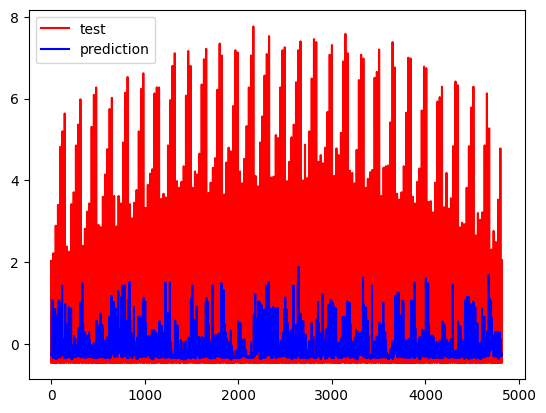

RMSE: 1.30


In [32]:
preds = []
X_test, Y_test = test_loc[1]
for i in range(len(X_test)):
    preds.append(model.predict(X_test[i].reshape(1, -1)))

plt.plot(Y_test, c='r', label='test')
plt.plot(preds, c='b', label='prediction')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
print('RMSE: %.2f' % mean_squared_error(Y_test, preds, squared=False))

In [74]:
#df_sales_test=pd.read_csv("/Users/yangweichao/Desktop/INFO558 Application of deep neutral network/beach_demand_forecast/sales_test.csv") #mac
df_sales_test=pd.read_csv(r"C:\Users\yangw\iCloudDrive\Desktop\INFO558 Application of deep neutral network\beach_demand_forecast\sales_test.csv") #windows
df_sales_test.date = pd.to_datetime(df_sales_test.date, errors='coerce')
df_sales_test

,id,date,item_id,price
0,0,2021-10-01,3,29.22
1,1,2021-10-01,4,26.42
2,2,2021-10-01,9,3.91
3,3,2021-10-01,12,4.87
4,4,2021-10-01,13,4.18
...,...,...,...,...
9195,9195,2021-12-31,96,21.93
9196,9196,2021-12-31,97,28.65
9197,9197,2021-12-31,98,5.00
9198,9198,2021-12-31,99,5.32


In [75]:
df_sales_test['day']=df_sales_test['date'].dt.day
df_sales_test['month']=df_sales_test['date'].dt.month
df_sales_test['weekday_num']=df_sales_test['date'].dt.weekday
df_sales_test['week'] = (((df_sales_test.date - start_date).dt.days)/7).astype(int) 
df_sales_test= df_sales_test.merge(df_items, on='item_id')
df_sales_test= df_sales_test.merge(df_restaurant, on='store_id')
df_sales_test= df_sales_test.merge(df_person, on='date')
df_sales_test=df_sales_test[['date','day','month','week','weekday_num','item_id','store_id','kcal','price','cost','person']]
df_sales_test

,date,day,month,week,weekday_num,item_id,store_id,kcal,price,cost,person
0,2021-10-01,1,10,143,4,3,1,931,29.22,29.22,15
1,2021-10-01,1,10,143,4,4,1,763,26.42,26.42,15
2,2021-10-01,1,10,143,4,9,1,135,3.91,3.91,15
3,2021-10-01,1,10,143,4,12,1,478,4.87,4.87,15
4,2021-10-01,1,10,143,4,13,1,490,4.18,4.18,15
...,...,...,...,...,...,...,...,...,...,...,...
9195,2021-12-31,31,12,156,4,84,5,855,19.77,19.77,18
9196,2021-12-31,31,12,156,4,87,5,627,7.22,7.22,18
9197,2021-12-31,31,12,156,4,91,5,468,15.46,15.46,18
9198,2021-12-31,31,12,156,4,93,5,585,12.44,12.44,18


In [76]:
scaler.fit(df_sales_test.iloc[:, 1:11])
SS_some_loc = scaler.transform(df_sales_test.iloc[:, 1:11])

pred=model.predict(SS_some_loc)

In [77]:
pred=pred*np.std(pred)+np.mean(pred)

df_sales_test['item_count']=pred
df_sales_test

,date,day,month,week,weekday_num,item_id,store_id,kcal,price,cost,person,item_count
0,2021-10-01,1,10,143,4,3,1,931,29.22,29.22,15,0.139974
1,2021-10-01,1,10,143,4,4,1,763,26.42,26.42,15,0.139974
2,2021-10-01,1,10,143,4,9,1,135,3.91,3.91,15,-0.252799
3,2021-10-01,1,10,143,4,12,1,478,4.87,4.87,15,-0.256454
4,2021-10-01,1,10,143,4,13,1,490,4.18,4.18,15,-0.256454
...,...,...,...,...,...,...,...,...,...,...,...,...
9195,2021-12-31,31,12,156,4,84,5,855,19.77,19.77,18,-0.162112
9196,2021-12-31,31,12,156,4,87,5,627,7.22,7.22,18,-0.231506
9197,2021-12-31,31,12,156,4,91,5,468,15.46,15.46,18,-0.231906
9198,2021-12-31,31,12,156,4,93,5,585,12.44,12.44,18,-0.231506


In [80]:
df_sales_test.drop(['item_id','date','day','month','week','weekday_num','store_id','kcal','price','cost','person'],axis=1,inplace=True)
df_sales_test.reset_index(inplace=True)
df_sales_test = df_sales_test.rename(columns = {'index':'id'})

In [82]:
df_sales_test.to_csv('submission.csv',index=False)